# Lecture 3

### Forward Accumulation Review

$$
y = x_1x_2 + \sin x_1
$$

Number of sweeps = number of independant variables. (To get all derivatives). $O(N)$


##### Computational Graph

![Alt text](../ComputationalGraphL3.png)

### Reverse Accumulation

We need a different rule for computing the derivatives (Called agjoints?):

$$
\bar{\omega}_i = \sum_{j\in \text{successors of }i}\bar{\omega}_j\frac{\partial\omega_j}{\partial\omega_i} \quad\text{--- adjoints : denote partials wrt dependent variable}
$$



##### Forward Run Comp Graph

![Alt text](../CompGraph2L3.png)

##### Reverse Run Comp Graph

![Alt text](../CompGraph3L3.png)

##### Notes:

In modern applications, Reverse Accumulation is used almost always. Forward Accumulation is only useful if you have a small number of parameters (or are too lazy to code out the Reverse Accumulation).

### Numerical Integration

1. Newton - Coates Formula
2. Quadrature


![Alt text](../NumIntL3.png)

$[x_0, x_N]$ Is a closed interval. 

Steps $x_i x_0 + ih$, $i\in[0,N]$ (for N dimensions, h is step size)

##### Basic

$$
I = h\sum_{i=0}^N f(x_i)
$$

breaking up as rectanges.

##### Trapezoidal Rule

(Comes from a Taylor Expansion)

$$
I = h\left[\frac{1}{2}f(x_0) + \sum_{i=1}^{N-1}f(x_i) + \frac{1}{2}f(x_N)\right]
$$

For $f$ that is a polynomial of degree 2, $I_{Trap}$ is exact.

##### Simpson's Rule

$$
I = h\left[\frac{1}{3}f(x_0) + \frac{4}{3}\sum_{i=1}^{N-1}f(x_i) + \frac{2}{3}\sum_{i=2}^{N-2}f(x_i) + \frac{1}{3}f(x_N)\right]
$$

In [2]:
import numpy as np
import matplotlib.pyplot as plt

[1.0, 0.5, 0.25, 0.125, 0.0625, 0.03125, 0.015625, 0.0078125, 0.00390625, 0.001953125] [np.float64(0.1265733644334639), np.float64(0.05161339779275309), np.float64(0.02295245805374002), np.float64(0.010766574791809869), np.float64(0.005206116452111109), np.float64(0.002558780630120938), np.float64(0.0012683218619626846), np.float64(0.0006313938768187644), np.float64(0.00031500517856342114), np.float64(0.00015732964955106343)]


<>:36: SyntaxWarning: invalid escape sequence '\D'
<>:36: SyntaxWarning: invalid escape sequence '\D'
/var/folders/6q/0_6f00ms6zj_w_mww_209f8r0000gn/T/ipykernel_75589/3230819477.py:36: SyntaxWarning: invalid escape sequence '\D'
  plt.xlabel('$\Delta$x')


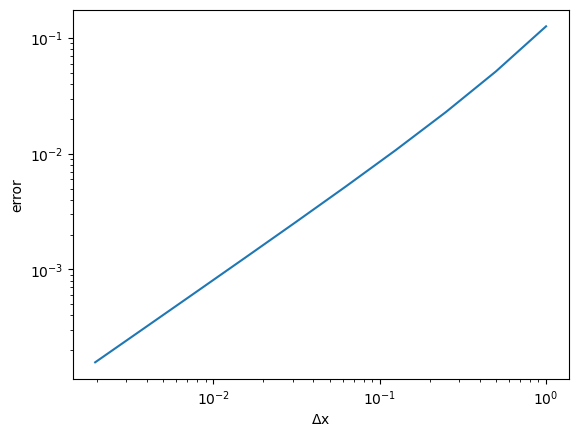

In [6]:
### integrate1.py ###

"""
This code follows the Basic Integration method (rectangles)
"""

def f(x):
    return np.cos(x)

def fi(x):
    return np.sin(x)

def basic(x, dx):
    sum = dx*f(x[:]).sum()
    return sum
             
xmin = 0.0
xmax = 10.0
n = 10
nmax = 10000
dxplot = []
errplot = []
while n < nmax:
    x = np.linspace(xmin, xmax, n+1)
    dx = (xmax-xmin)/n
    num_int = basic(x, dx)
    true_int = fi(xmax)-fi(xmin)
    errplot.append(abs(num_int - true_int))
    dxplot.append(dx)
    n *= 2

print(dxplot, errplot)
plt.figure()
plt.plot(dxplot, errplot)
plt.loglog()
plt.xlabel('$\Delta$x')
plt.ylabel('error')
plt.show()


<>:32: SyntaxWarning: invalid escape sequence '\D'
<>:32: SyntaxWarning: invalid escape sequence '\D'
/var/folders/6q/0_6f00ms6zj_w_mww_209f8r0000gn/T/ipykernel_75589/1394468881.py:32: SyntaxWarning: invalid escape sequence '\D'
  plt.xlabel('$\Delta$x')


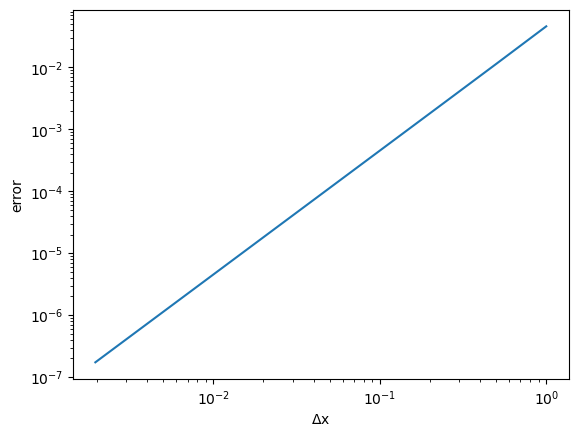

In [4]:
### integrate2.py ###

"""
This method follows Trapezoidal Integration.
"""


def f(x):
    return np.cos(x)

def fi(x):
    return np.sin(x)

def trapezoid(x, dx):
    sum = dx*f(x[0])/2.0 + dx*f(x[-1])/2.0
    sum += dx*f(x[1:-1]).sum()
    return sum
             
xmin = 0.0
xmax = 10.0
n = 10
nmax = 10000
dxplot = []
errplot = []
while n < nmax:
    x = np.linspace(xmin, xmax, n+1)
    dx = (xmax-xmin)/n
    num_int = trapezoid(x, dx)
    true_int = fi(xmax)-fi(xmin)
    dxplot.append(dx)
    errplot.append(abs(num_int - true_int))
    n *= 2

plt.figure()
plt.plot(dxplot, errplot)
plt.loglog()
plt.xlabel('$\Delta$x')
plt.ylabel('error')
plt.show()


<>:30: SyntaxWarning: invalid escape sequence '\D'
<>:30: SyntaxWarning: invalid escape sequence '\D'
/var/folders/6q/0_6f00ms6zj_w_mww_209f8r0000gn/T/ipykernel_75589/3735145887.py:30: SyntaxWarning: invalid escape sequence '\D'
  plt.xlabel('$\Delta$x')


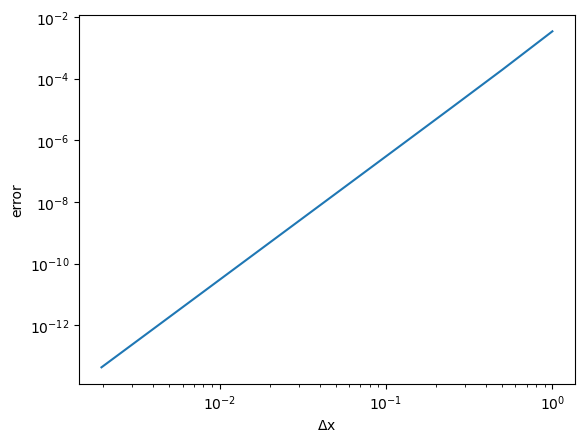

In [5]:
### integrate3.py ###

"""
This method follows Simpson Integration.
"""

def f(x):
    return np.cos(x)

def fi(x):
    return np.sin(x)

def simpson(x, dx):
    return dx*(f(x[0]) + 4*f(x[1:-1:2]).sum() + 2*f(x[2:-2:2]).sum() + f(x[-1]))/3
             
xmin = 0.0
xmax = 10.0
n = 10
nmax = 10000
dxplot = []
errplot = []
while n < nmax:
    x = np.linspace(xmin, xmax, n+1)
    dx = (xmax-xmin)/n
    dxplot.append(dx)
    num_int = simpson(x, dx)
    true_int = fi(xmax)-fi(xmin)
    errplot.append(abs(num_int - true_int))
    n *= 2

plt.figure()
plt.plot(dxplot, errplot)
plt.loglog()
plt.xlabel('$\Delta$x')
plt.ylabel('error')
plt.show()
